In [2]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

%load_ext lab_black

In [4]:
def plot_distribution(data_array: np.array):
    """
    输入二维的array，输出相应的面积图片
    这里人为定义了vmax的数值，之后可能需要改改
    """
    shape = data_array.shape
    x = np.arange(0, shape[1])  # len = 11
    y = np.arange(0, shape[0])  # len = 7

    fig, ax = plt.subplots(dpi=150)
    pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap="Blues")
    fig.colorbar(pcm, ax=ax)

In [4]:
def read_cdf_get_pm25(folder_path, add_var_list):
    """
    read the netcdf file, select the var, add to get the pm25
    return: the list of np.array
    """
    names = os.listdir(folder_path)

    for i, name in enumerate(names):
        print(i, name)
        file_obj = nc.Dataset("".join([folder_path, "/", name]))
        # arr: the added data
        arr = np.zeros((24, 1, 216, 270))
        for var in add_var_list:
            arr = arr + np.array(file_obj.variables[var][:], dtype=float)
        # change the form
        arr = np.array([i[0] for i in arr])
        # split the hour
        for j, hourly_arr in enumerate(arr):
            np.save("data/PM25_hourly/{}-{}.npy".format(name[39:47], j), hourly_arr)
            print("save hour {} at {}".format(j, name[39:47]))

In [5]:
name_list = [
    "PNO3",
    "PSO4",
    "PNH4",
    "POA",
    "SOA1",
    "SOA2",
    "SOA3",
    "SOA4",
    "SOPA",
    "SOPB",
    "PEC",
    "FPRM",
    "FCRS",
]

In [6]:
basePath = "data/china_camx_original"
pmList = read_cdf_get_pm25(basePath, name_list)

0 CAMx.v6.50.China20km_nox_1.00_voc_1.00.20181215.avrg.grd01.nc
save hour 0 at 20181215
save hour 1 at 20181215
save hour 2 at 20181215
save hour 3 at 20181215
save hour 4 at 20181215
save hour 5 at 20181215
save hour 6 at 20181215
save hour 7 at 20181215
save hour 8 at 20181215
save hour 9 at 20181215
save hour 10 at 20181215
save hour 11 at 20181215
save hour 12 at 20181215
save hour 13 at 20181215
save hour 14 at 20181215
save hour 15 at 20181215
save hour 16 at 20181215
save hour 17 at 20181215
save hour 18 at 20181215
save hour 19 at 20181215
save hour 20 at 20181215
save hour 21 at 20181215
save hour 22 at 20181215
save hour 23 at 20181215
1 CAMx.v6.50.China20km_nox_1.00_voc_1.00.20181216.avrg.grd01.nc
save hour 0 at 20181216
save hour 1 at 20181216
save hour 2 at 20181216
save hour 3 at 20181216
save hour 4 at 20181216
save hour 5 at 20181216
save hour 6 at 20181216
save hour 7 at 20181216
save hour 8 at 20181216
save hour 9 at 20181216
save hour 10 at 20181216
save hour 11 at 2

In [12]:
# test
path = "data/PM25_hourly/20190725-13.npy"
t = np.load(path, allow_pickle=True)

<ipython-input-2-1fa27a93d7f2>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap="Blues")


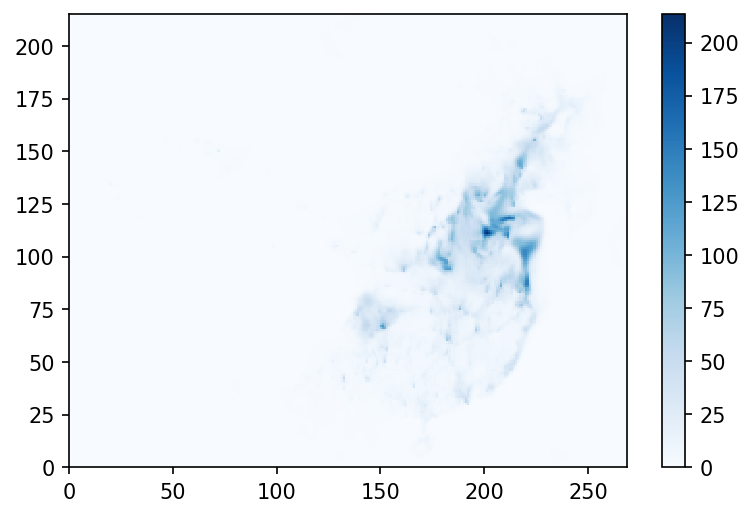

In [13]:
plot_distribution(t)

In [ ]:
len(pmList)

# sample by station PM25

In [8]:
data = np.load("data/PM25_hourly_sample_by_station/20191215-10.npy")

<ipython-input-4-1fa27a93d7f2>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap="Blues")


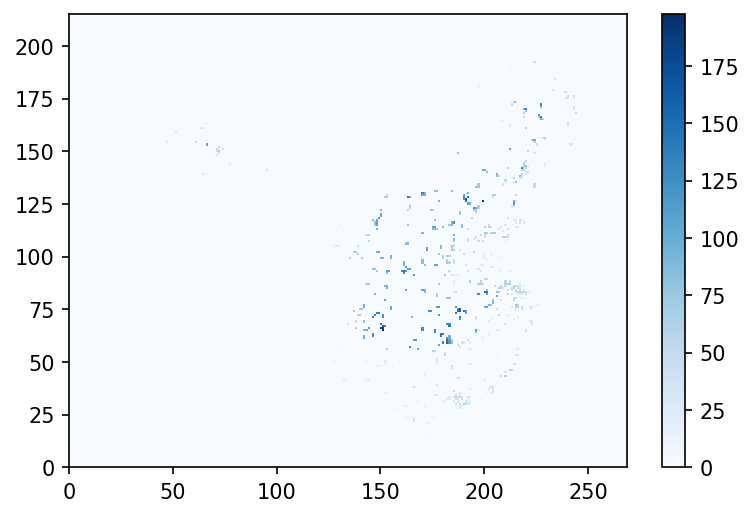

In [9]:
plot_distribution(data)